### Business Case : To predict future flight prices and plan the journey accordingly.

In [1]:
import numpy as np # importing numpy
import pandas as pd # importing pandas
import matplotlib.pyplot as plt # importing matplotlib for visualization
%matplotlib inline # Inline plotting
import seaborn as sns # importing advanced visualization

In [2]:
import warnings # hiding or ignoring warning messages 
warnings.filterwarnings('ignore') # Ignore warnings

In [3]:
data=pd.read_excel("Flight_Fare.xlsx") # Reading the Excel file into a DataFrame 
data # Displaying the DataFrame

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


#### Domain Analysis

- Airline : So this column will have all the types of airlines like Indigo, Jet Airways, Air India, and many more.
- Date_of_Journey : This column will let us know about the date on which the passenger’s journey will start.
- Source : This column holds the name of the place from where the passenger’s journey will start.
- Destination : This column holds the name of the place to where passengers wanted to travel.
- Route : Here we can know about what the route is through which passengers have opted to travel from his/her source to their destination.
- Arrival_Time : Arrival time is when the passenger will reach his/her destination.
- Duration : Duration is the whole period that a flight will take to complete its journey from source to destination.
- Total_Stops : This will let us know in how many places flights will stop there for the flight in the whole journey.
- Additional_Info : In this column, we will get information about food, kind of food, and other amenities.
- Price : Price of the flight for a complete journey including all the expenses before onboarding.

#### Basic Checks

In [4]:
data.head() # displays first 5 rows including 0

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
data.tail() # display last 5 rows

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
data.info() # summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
data.describe() # summary statistics for numerical columns

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
data.shape # Dimensions (rows,columns)

(10683, 11)

- There are 10683 rows and 11 columns.

#### Target - Price

EDA

##### Univariate Analysis

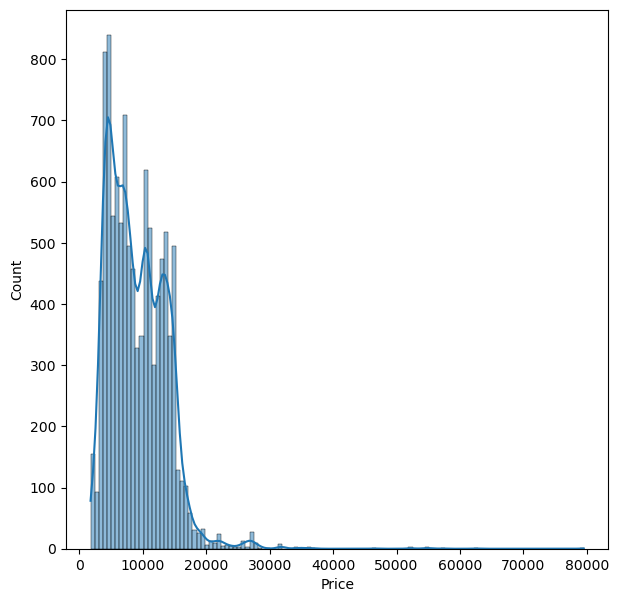

In [9]:
plt.figure(figsize=(7,7)) # (width,height)
sns.histplot(x=data['Price'],kde=True) # sns -> seaborn | histplot -> histogram | 'Price' -> column | kde=True -> Kernel Density Estimate (KDE) curve
plt.show() # display plot

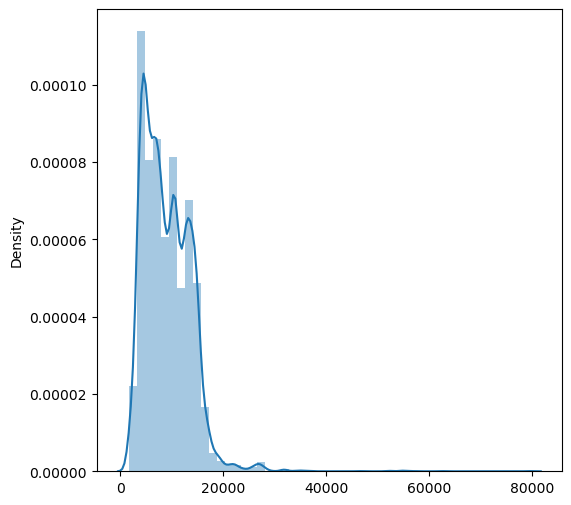

In [10]:
plt.figure(figsize=(6,6)) # size of the figure (width,height)
sns.distplot(x=data['Price'],kde=True) # x= variable name | Price -> column name | kde=True -> Kernal Density Estimate (KDE) curve
plt.show() # display plot

In [11]:
data['Price'].skew() # calculate the skewness of the column Price 

1.8125523782189141

-  its right skewed

In [12]:
data['Price'].kurtosis() # measures the tailedness of the distribution

13.303329535944567

- high kurtosis with high tails & peaked shape

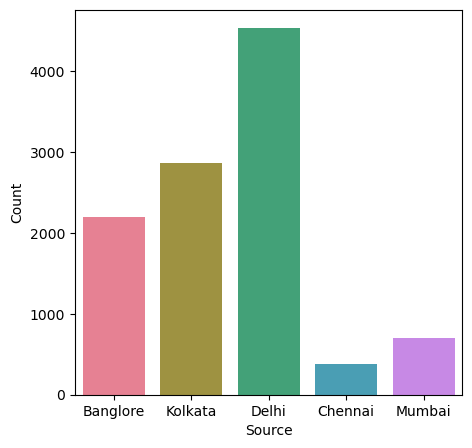

In [13]:
plt.figure(figsize=(5,5)) # size of the figure (width,height)
sns.countplot(x='Source',data=data,palette="husl") # sns -> seaborn | 
                        # countplot() -> creates a barplot showing count of unique values in 'Source' column
                        #x='Source' -> sets 'Source' as the x axis(categorical column)
                    +pb vclt.xlabel('Source', size=10) # sets the label for the x-axis as "Source" with a font size of 10 
plt.ylabel('Count', size=10) # sets the y-axis label to "Count" with a font size of 10
plt.show() # diplay the plot

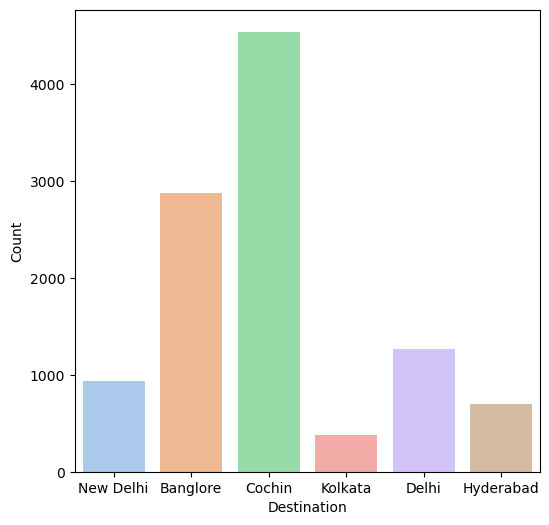

In [14]:
plt.figure(figsize=(6,6)) # figure size
sns.countplot(x='Destination',data=data,palette = "pastel") # creates a count plot of the "Destination" column from the data
plt.xlabel('Destination', size=10) # sets the x-axis label to "Destination" with a font size of 10
plt.ylabel('Count', size=10) # sets the y-axis label to "Count" with a font size of 10
plt.show() # displays the plot

#### Bivariate Analysis

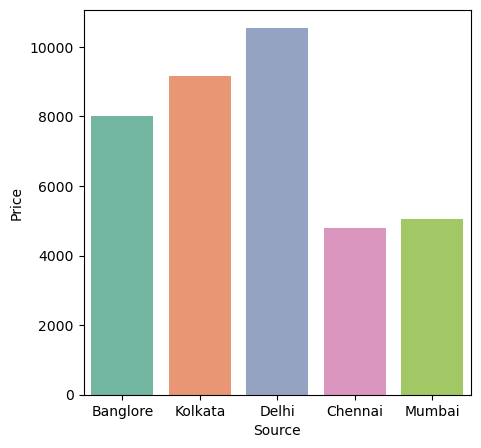

In [15]:
plt.figure(figsize=(5,5)) # figure size
sns.barplot(x='Source',y='Price',data=data,palette="Set2",ci = None) # creates a bar plot using Seaborn, where "Source" is on the x-axis | Price is on the y-axis | Set2 color palette | without a confidence interval (ci=None) 
plt.xlabel('Source', size=10) # sets the x-axis label to Source with a font size of 10
plt.ylabel('Price', size=10) # sets the y-axis label to "Price" with a font size of 10
plt.show() # displays the plot
# sns.set_style("white")


- Flight prices is quite high in Delhi than compared to other sources.

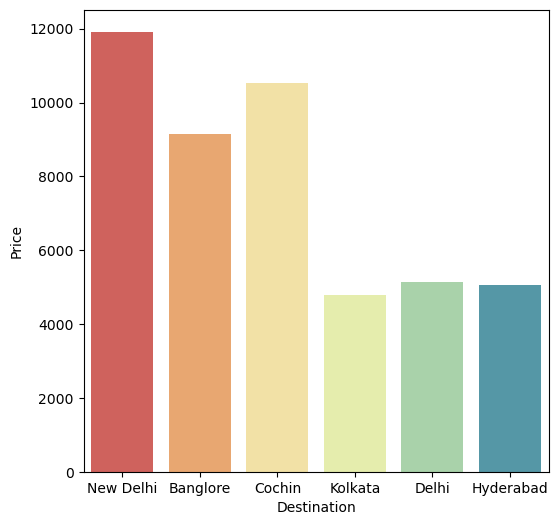

In [16]:
plt.figure(figsize=(6,6)) # figure size 
sns.barplot(x='Destination',y='Price',data=data,ci=None,palette = "Spectral") # Destination is on the x-axis | Price is on the y-axis | Spectral is for color palette | without a confidence interval (ci=None)
plt.xlabel('Destination', size=10) # sets the x-axis label to Destination with a font size of 10
plt.ylabel('Price', size=10) # sets the y-axis label to Price with a font size of 10
plt.show() # displays the plot

- Prices are quite high for Delhi as destination.
- Flight Fare for kolkata is comparatively low as compared to other destinations.

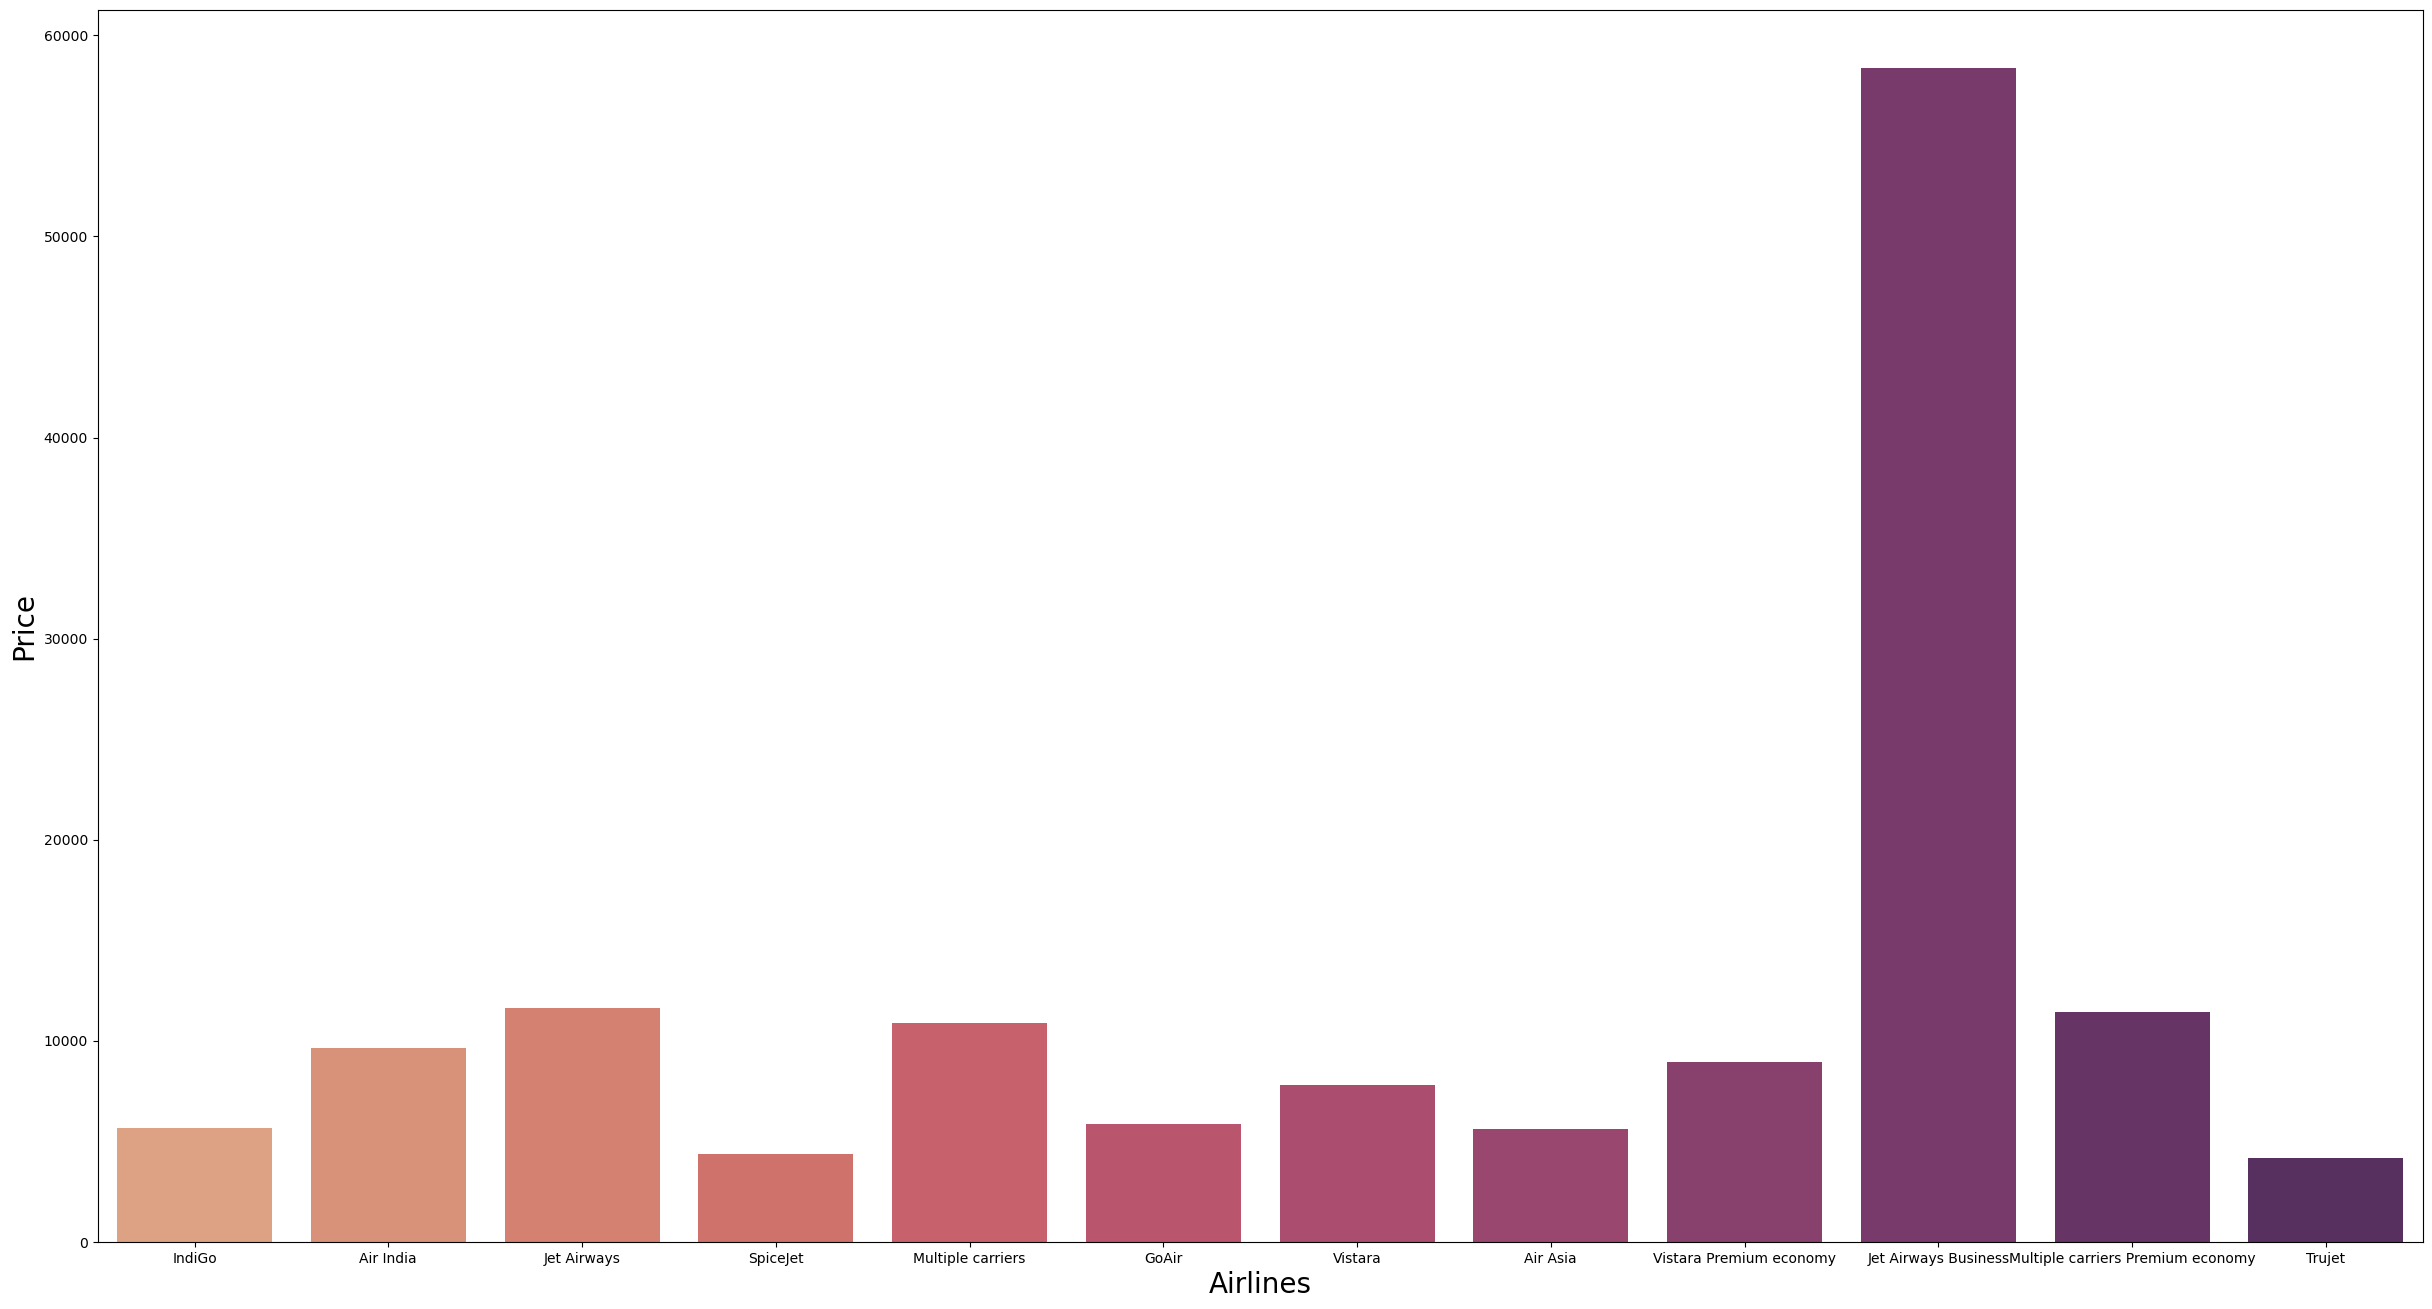

<Figure size 640x480 with 0 Axes>

In [17]:
plt.figure(figsize=(30,16)) # figure size
sns.barplot(x='Airline',y='Price',data=data,ci=None,palette= "flare") # x axis -> Airlines | y axis -> Price | data -> DataFrame| ci = None -> without a confidence interval | flare -> color palette
plt.xlabel('Airlines', size=20) # x axis -> Airlines | font size -> 20
plt.ylabel('Price', size=20) # y axis -> Price | font size -> 20
plt.show() # display the plot
plt.tight_layout() # adjusts the spacing of subplots

- Costliest Flight Tickets Sold is of Jet Airways Business .
- Second Most Costliest Flight Tickets Sold is of Jet Airways .
- As can be seen, the airline’s name is important. The most expensive option is ‘JetAirways Business.’ The cost of other carriers varies as well.
- We’ll use one-hot encoding to handle the Airline variable because it’s Nominal Categorical Data (airline names have no order of any kind).

In [18]:
data.Airline.value_counts() # returns the count of unique values in the column "Airline"

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

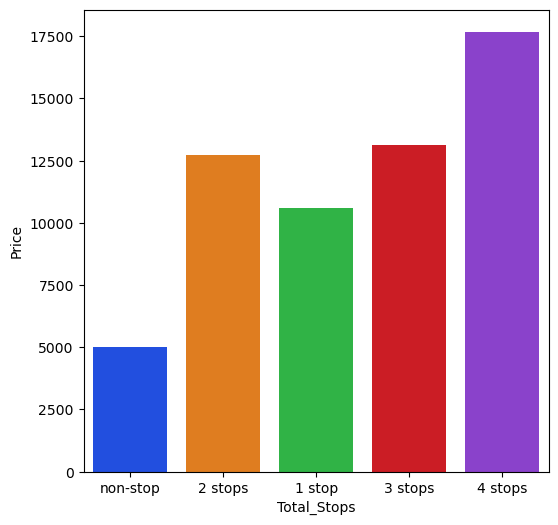

In [20]:
plt.figure(figsize=(6,6)) # figure size
sns.barplot(x='Total_Stops',y='Price',data=data,ci = None,palette = "bright") # x axis -> "Total_Stops" | y axis -> "Price" | data -> DataFrame | "bright" -> color palette | ci=None -> without a confidence interval
plt.xlabel('Total_Stops', size=10) x axis -> "Total_Stops" | font size -> 10
plt.ylabel('Price', size=10) # y axis -> "Price" | font size -> 10
plt.show() # display the plot

- Flight fare for more than 1 stop is quite high.

#### Multivariate Analysis

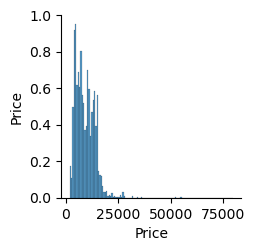

In [21]:
sns.pairplot(data) # generates scatter plots for all numerical variable combinations in the data

### Data Preprocessing

#### Handling Missing Values

In [22]:
data.isnull().sum() # display the missing values in each column

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [23]:
data.loc[data.Route.isnull()==True,'Route'] # displays the rows from Data where the "Route" column has any missing values

9039    NaN
Name: Route, dtype: object

In [24]:
data.loc[data.Total_Stops.isnull()==True,'Total_Stops'] # displays the rows from the Data where the column "Total_Stops" has any missing values

9039    NaN
Name: Total_Stops, dtype: object

In [25]:
data['Route']=data['Route'].fillna(data['Route'].mode()[0]) # mode() -> handle missing values in the categorical column "Route"
data['Total_Stops']=data['Total_Stops'].fillna(data['Total_Stops'].mode()[0]) # handle missing values in the categorical column "Total_Stops"

In [26]:
data.isnull().sum() # used to find missing values in each column

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

- Missing values are handled. 
- Mode is used to handle missing values as the columns are categorical.

#### Converting Categorical Into Numerical Columns

In [28]:
# Date_of_Journey is the day when plane departs. 
data["journey_day"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.day # day is extracted from "Date_of_Journey" column and stores the day in a new column named "journey_day" | pd.to_datetime(data.Date_of_Journey,format="%d/%m/%Y") -> converts the "Date_of_Journey" column from a string format ("%d/%m/%Y") to a datetime object
data["journey_month"] = pd.to_datetime(data["Date_of_Journey"], format = "%d/%m/%Y").dt.month # month is extracted from the "Date_of_Journey" column and stores in the new column named "journey_month" 
data.head() # displays first 5 rows including 0
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
data.drop(["Date_of_Journey"], axis = 1, inplace = True) # axis=1 -> Specifies column to be dropped | inplace =True -> Permanently drops the column from the data DataFrame

# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time
# Extracting Hours
data["dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour # extracts hour from the "Dep_Time" column and stores the value in "dep_hour"
# Extracting Minutes
data["dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute # extracts minute from "Dep_Time" coumn and stores the value in a new column "dep_min"
# Now we drop Dep_Time as it is of no use
data.drop(["Dep_Time"], axis = 1, inplace = True)  # axis=1 -> Specifies column to be dropped | inplace =True -> Permanently drops the column from the data DataFrame

# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time
# Extracting Hours
data["arrival_hour"] = pd.to_datetime(data["Arrival_Time"]).dt.hour # extracts hour from the column "Arrival_Time" coumn and stores the values in new column named "arrival_hour"
# Extracting Minutes
data["arrival_min"] = pd.to_datetime(data["Arrival_Time"]).dt.minute # extracts minute from the column "Arrival_Time" and stores it in a new column called "arrival_min"
# Now we can drop Arrival_Time as it is of no use
data.drop(["Arrival_Time"], axis = 1, inplace = True) # axis=1 -> Specifies column to be dropped | inplace =True -> Permanently drops the column from the data DataFrame

In [29]:
# Duration is the time taken by plane to reach destination
# It is the difference betwen Arrival Time and Departure time
# Assigning and converting Duration column into list, for looping through
duration = list(data["Duration"])
# In table above, Row Index=2, we have Duration = 19h (missing minutes)
# Looping through all duration values
# To ensure it has both hours & mins: 'xh ym'
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour
# Prepare separate duration_hours and duration_mins lists
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
# Add duration_hours and duration_mins list to our dataset df
data["Duration_hours"] = duration_hours
data["Duration_mins"] = duration_mins
# Drop Duration column from the dataset
data.drop(["Duration"], axis = 1, inplace = True)

In [30]:
data # calling the data it displays first 5 rows and last 5 rows

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2,40


- Since Airline, Source and Destination are nominal categorical data we apply OneHotEncoding.

In [32]:
df=data[['Airline']]
df=pd.get_dummies(df,drop_first=True) # applies onehot enncoding to the categorical columns 

df1=data[['Source']]
df1=pd.get_dummies(df1,drop_first=True) # applies onehot enncoding to the categorical columns 

df2=data[['Destination']]
df2=pd.get_dummies(df2,drop_first=True) # applies onehot enncoding to the categorical columns 

In [33]:
df=df.astype('int64') # converts all columns to int64 data type
df1=df1.astype('int64') # converts all columns in the df1 DataFrame to int64 data type
df2=df2.astype('int64') # converts all columns in the df2 DataFrame to int64 data type

In [34]:
d=pd.concat([df,df1,df2],axis=1) # concatenates the DataFrames df, df1, and df2 along the columns (axis=1) and stores the result in d
d

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [35]:
data.drop(['Airline','Source','Destination'],axis=1,inplace=True) # drops column 'Airline','Source','Destination' from data | axis=1 -> column | inplace=True ->permanent delete

In [36]:
data=pd.concat([data,d],axis=1) # concatenates the DataFrames data and d along the columns (axis=1) and stores the result back in data

In [37]:
data # calling the DataFrame

,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,...,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,...,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,...,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,...,0,0,0,1,0,0,0,0,0,0
10679,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,...,0,0,0,1,0,0,0,0,0,0
10680,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,...,0,0,0,0,0,0,1,0,0,0
10681,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,...,0,0,0,0,0,0,0,0,0,1


- We use manual encoding for Total_Stops.

In [38]:
data.Total_Stops.unique() # returns the unique value from "Total_Stops" column

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [39]:
data.Total_Stops=data.Total_Stops.map({'non-stop':0, '2 stops':1, '1 stop':2, '3 stops':3, '4 stops':4}) # Converts text-based stop categories into numerical values

In [40]:
data # calling the DataFrame

,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,0,No info,3897,24,3,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,1,No info,7662,1,5,5,50,13,15,...,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,1,No info,13882,9,6,9,25,4,25,...,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,2,No info,6218,12,5,18,5,23,30,...,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,2,No info,13302,1,3,16,50,21,35,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,CCU → BLR,0,No info,4107,9,4,19,55,22,25,...,0,0,0,1,0,0,0,0,0,0
10679,CCU → BLR,0,No info,4145,27,4,20,45,23,20,...,0,0,0,1,0,0,0,0,0,0
10680,BLR → DEL,0,No info,7229,27,4,8,20,11,20,...,0,0,0,0,0,0,1,0,0,0
10681,BLR → DEL,0,No info,12648,1,3,11,30,14,10,...,0,0,0,0,0,0,0,0,0,1


#### Checking For Outliers

<Axes: xlabel='Price'>

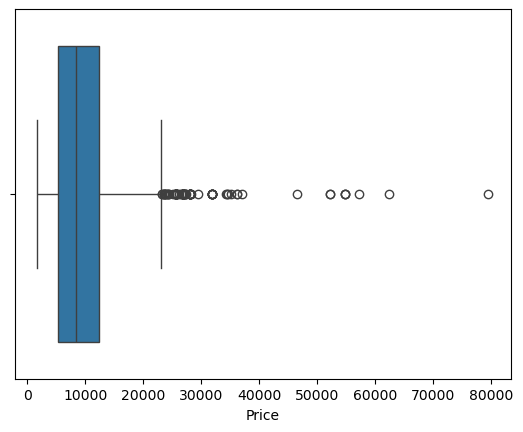

In [45]:
sns.boxplot(x='Price',data=data) # creates a boxplot for "Price" column in the data to find the outliers

In [46]:
Q1=data['Price'].quantile(0.25) # calculates the first quartile (Q1) of the "Price" column
print('lower quantile',Q1) # prints the value calculated in Q1
Q3=data['Price'].quantile(0.75) # # calculates the third quartile (Q3) of the "Price" column
print('upper quantile',Q3) # # prints the value calculated in Q3

lower quantile 5277.0
upper quantile 12373.0


In [47]:
IQR = Q3 - Q1 # finds the inter quartile range (IQR) by using  first quartile and third quartile
IQR

7096.0

In [48]:
lower_limit=Q1-1.5*IQR # calculates lower limit for detecting outliers using (IQR) method
print('Lower limit is : ',lower_limit)
upper_limit=Q3+1.5*IQR # calculates upper limit for detecting outliers using (IQR) method
print('Upper limit is : ',upper_limit)

Lower limit is :  -5367.0
Upper limit is :  23017.0


- Handle Outliers only if data has less than 5% of the outliers.
- Since, Price does not follow normal distribution, median is used to handle outliers.

In [51]:
len(data.loc[data['Price']>upper_limit])/len(data) # proportion of outliers in the "Price" column

0.008799026490686137

In [52]:
data.loc[data['Price']>23017.0,'Price']=np.median(data['Price']) # replaces all values in the "Price" column that are greater than 23,017 with the median price of the dataset 

<Axes: xlabel='Price'>

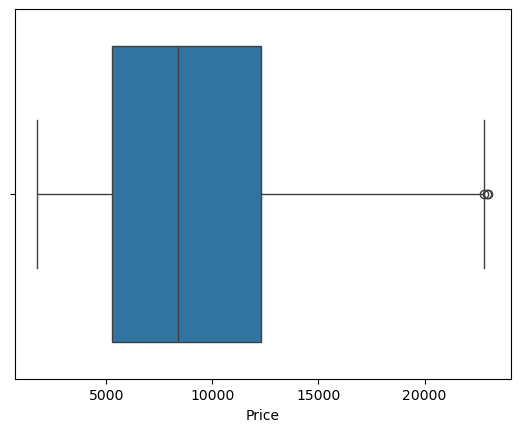

In [53]:
sns.boxplot(x='Price',data=data) # displays a boxplot for the "Price" column

- Outliers are handled.

#### Scaling

In [55]:
data # calling the data DataFrame displays first 5 rows and last 5 rows

,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,0,No info,3897,24,3,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,1,No info,7662,1,5,5,50,13,15,...,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,1,No info,13882,9,6,9,25,4,25,...,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,2,No info,6218,12,5,18,5,23,30,...,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,2,No info,13302,1,3,16,50,21,35,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,CCU → BLR,0,No info,4107,9,4,19,55,22,25,...,0,0,0,1,0,0,0,0,0,0
10679,CCU → BLR,0,No info,4145,27,4,20,45,23,20,...,0,0,0,1,0,0,0,0,0,0
10680,BLR → DEL,0,No info,7229,27,4,8,20,11,20,...,0,0,0,0,0,0,1,0,0,0
10681,BLR → DEL,0,No info,12648,1,3,11,30,14,10,...,0,0,0,0,0,0,0,0,0,1


In [56]:
data.columns # fetches the entire column names from the data DataFrame

Index(['Route', 'Total_Stops', 'Additional_Info', 'Price', 'journey_day',
       'journey_month', 'dep_hour', 'dep_min', 'arrival_hour', 'arrival_min',
       'Duration_hours', 'Duration_mins', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [57]:
from sklearn.preprocessing import StandardScaler # imports the StandardScaler class from scikit-learn's preprocessing module
scale=StandardScaler() # initializes StandardScaler object from scikit - learn for feature scaling
data[['Price','journey_day','journey_month','dep_hour','dep_min','arrival_hour','arrival_min','Duration_hours','Duration_mins']]=scale.fit_transform(data[['Price','journey_day','journey_month','dep_hour','dep_min','arrival_hour','arrival_min','Duration_hours','Duration_mins']]) # standardizes multiple numerical columns in the data DataFrame using StandardScaler

In [58]:
data # calling the data

,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,0,No info,-1.233198,1.237383,-1.467490,1.654259,-0.235050,-1.800427,-0.890057,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,1,No info,-0.303863,-1.475239,0.250276,-1.303095,1.363492,-0.050851,-0.587124,...,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,1,No info,1.231452,-0.531719,1.109160,-0.607247,0.031373,-1.363033,0.018744,...,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,2,No info,-0.660293,-0.177898,0.250276,0.958411,-1.034321,1.407129,0.321677,...,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,2,No info,1.088288,-1.475239,-1.467490,0.610487,1.363492,1.115533,0.624611,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,CCU → BLR,0,No info,-1.181363,-0.531719,-0.608607,1.132373,1.629915,1.261331,0.018744,...,0,0,0,1,0,0,0,0,0,0
10679,CCU → BLR,0,No info,-1.171983,1.591203,-0.608607,1.306335,1.097068,1.407129,-0.284190,...,0,0,0,1,0,0,0,0,0,0
10680,BLR → DEL,0,No info,-0.410743,1.591203,-0.608607,-0.781209,-0.235050,-0.342447,-0.284190,...,0,0,0,0,0,0,1,0,0,0
10681,BLR → DEL,0,No info,0.926857,-1.475239,-1.467490,-0.259323,0.297797,0.094947,-0.890057,...,0,0,0,0,0,0,0,0,0,1


In [59]:
data.duplicated().sum() # counts the number of duplicate rows in the data DataFrame

222

In [60]:
data.loc[data.duplicated(keep=False),:] # retrieves all duplicate rows in the data DataFrame, including all occurrences of duplicates

,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
33,DEL → NAG → BOM → COK,1,In-flight meal not included,0.500079,0.175922,1.109160,0.262563,0.564221,-0.196649,0.624611,...,0,0,1,0,0,1,0,0,0,0
49,DEL → AMD → BOM → COK,1,In-flight meal not included,0.557098,1.591203,1.109160,1.828221,-1.034321,0.823937,-1.495925,...,0,0,1,0,0,1,0,0,0,0
73,DEL → AMD → BOM → COK,1,No info,0.969066,1.237383,1.109160,1.828221,-1.034321,-0.196649,0.624611,...,0,0,1,0,0,1,0,0,0,0
81,BLR → DEL,0,No info,-0.410743,1.237383,-1.467490,1.132373,1.629915,1.261331,0.624611,...,0,0,0,0,0,0,0,0,0,1
87,DEL → JAI → BOM → COK,1,No info,1.017199,-0.885539,1.109160,-0.607247,0.830644,-1.363033,0.018744,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10594,DEL → AMD → BOM → COK,1,No info,0.969066,1.591203,1.109160,1.828221,-1.034321,-0.196649,0.624611,...,0,0,1,0,0,1,0,0,0,0
10616,DEL → JAI → BOM → COK,1,No info,1.017199,-1.475239,1.109160,-0.607247,0.830644,-0.196649,0.624611,...,0,0,1,0,0,1,0,0,0,0
10634,DEL → JAI → BOM → COK,1,In-flight meal not included,0.701003,-0.885539,1.109160,-0.607247,0.830644,-0.196649,0.624611,...,0,0,1,0,0,1,0,0,0,0
10672,DEL → AMD → BOM → COK,1,In-flight meal not included,0.557098,1.591203,1.109160,1.828221,-1.034321,0.823937,-1.495925,...,0,0,1,0,0,1,0,0,0,0


In [61]:
data.drop_duplicates(keep='first',inplace=True) # removes duplicate rows from the data DataFrame while keeping the first occurrence of each duplicate

In [62]:
data.shape # (rows,columns)

(10461, 32)

In [63]:
data.duplicated().sum() # checks for duplicate values in the data DataFrame

0

In [64]:
data.isnull().sum() # checks for any null values in entire columm in the data DataFrame

Route                                        0
Total_Stops                                  0
Additional_Info                              0
Price                                        0
journey_day                                  0
journey_month                                0
dep_hour                                     0
dep_min                                      0
arrival_hour                                 0
arrival_min                                  0
Duration_hours                               0
Duration_mins                                0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vista

#### Feature Selection

##### Removing Unwanted Columns

- Route is a redundant feature, as we have Total_Stops that also captures similar information on Stoppages.
- For Additional_Info, 80% of the observations say no_info, so doesn’t add much value.
- These 2 columns can be dropped.

In [66]:
data.drop(['Route','Additional_Info'],axis=1,inplace=True) #  drops the unwanted column named "Route","Additional_Info" | axis=1 ->entire column | inplace=True -> permanent deletion
data # checking for the column has it removed

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,-1.233198,1.237383,-1.467490,1.654259,-0.235050,-1.800427,-0.890057,-0.970698,1.279008,...,0,0,0,0,0,0,0,0,0,1
1,1,-0.303863,-1.475239,0.250276,-1.303095,1.363492,-0.050851,-0.587124,-0.382117,-0.196388,...,0,0,0,1,0,0,0,0,0,0
2,1,1.231452,-0.531719,1.109160,-0.607247,0.031373,-1.363033,0.018744,1.030476,-1.671784,...,0,0,1,0,0,1,0,0,0,0
3,2,-0.660293,-0.177898,0.250276,0.958411,-1.034321,1.407129,0.321677,-0.617549,-0.196388,...,0,0,0,1,0,0,0,0,0,0
4,2,1.088288,-1.475239,-1.467490,0.610487,1.363492,1.115533,0.624611,-0.735265,0.983929,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,-1.181363,-0.531719,-0.608607,1.132373,1.629915,1.261331,0.018744,-0.970698,0.098691,...,0,0,0,1,0,0,0,0,0,0
10679,0,-1.171983,1.591203,-0.608607,1.306335,1.097068,1.407129,-0.284190,-0.970698,0.393770,...,0,0,0,1,0,0,0,0,0,0
10680,0,-0.410743,1.591203,-0.608607,-0.781209,-0.235050,-0.342447,-0.284190,-0.852981,-1.671784,...,0,0,0,0,0,0,1,0,0,0
10681,0,0.926857,-1.475239,-1.467490,-0.259323,0.297797,0.094947,-0.890057,-0.970698,0.688849,...,0,0,0,0,0,0,0,0,0,1


In [67]:
data.corr() # calculates the correlation matrix | 1 -> Perfect positive correlation | -1 → Perfect negative correlation | 0 -> No correlation

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Total_Stops,1.000000,0.564856,-0.034000,0.012045,-0.038208,-0.057876,0.107876,-0.183810,0.545596,-0.181233,...,-0.022425,-0.257409,0.441525,0.121379,-0.301921,0.441525,-0.491062,-0.301921,-0.257409,0.042319
Price,0.564856,1.000000,-0.121446,-0.059212,0.005221,-0.053462,0.045773,-0.097284,0.567492,-0.146932,...,0.000557,-0.193852,0.322320,0.046301,-0.256081,0.322320,-0.337400,-0.256081,-0.193852,0.108849
journey_day,-0.034000,-0.121446,1.000000,-0.038363,-0.003387,-0.004928,-0.002428,-0.015125,-0.029514,-0.009236,...,-0.020263,0.007762,0.095794,-0.057370,-0.012738,0.095794,0.004708,-0.012738,0.007762,-0.076036
journey_month,0.012045,-0.059212,-0.038363,1.000000,0.040874,-0.062723,0.000902,-0.099581,0.006181,-0.045963,...,-0.019920,0.006840,0.130665,0.091560,-0.038276,0.130665,0.093778,-0.038276,0.006840,-0.452008
dep_hour,-0.038208,0.005221,-0.003387,0.040874,1.000000,-0.015032,-0.003222,0.073340,-0.000433,-0.019291,...,-0.003381,-0.014570,-0.125118,0.160758,-0.016871,-0.125118,0.010570,-0.016871,-0.014570,-0.023047
dep_min,-0.057876,-0.053462,-0.004928,-0.062723,-0.015032,1.000000,0.046372,-0.021437,-0.022051,0.089466,...,-0.011469,0.067674,-0.087817,-0.023454,0.038044,-0.087817,0.003249,0.038044,0.067674,0.108138
arrival_hour,0.107876,0.045773,-0.002428,0.000902,-0.003222,0.046372,1.000000,-0.152461,0.065178,-0.116327,...,0.000685,-0.016116,-0.001624,0.054504,-0.035493,-0.001624,-0.033449,-0.035493,-0.016116,-0.002539
arrival_min,-0.183810,-0.097284,-0.015125,-0.099581,0.073340,-0.021437,-0.152461,1.000000,-0.076136,0.156482,...,0.000283,-0.031092,-0.210295,0.117428,0.081273,-0.210295,0.095293,0.081273,-0.031092,0.020501
Duration_hours,0.545596,0.567492,-0.029514,0.006181,-0.000433,-0.022051,0.065178,-0.076136,1.000000,-0.133675,...,-0.016231,-0.186311,0.280569,0.140570,-0.232341,0.280569,-0.345630,-0.232341,-0.186311,0.016364
Duration_mins,-0.181233,-0.146932,-0.009236,-0.045963,-0.019291,0.089466,-0.116327,0.156482,-0.133675,1.000000,...,0.005144,-0.098929,-0.163251,0.018269,-0.017157,-0.163251,0.224332,-0.017157,-0.098929,0.077907


##### Checking For Collinearity

<Axes: >

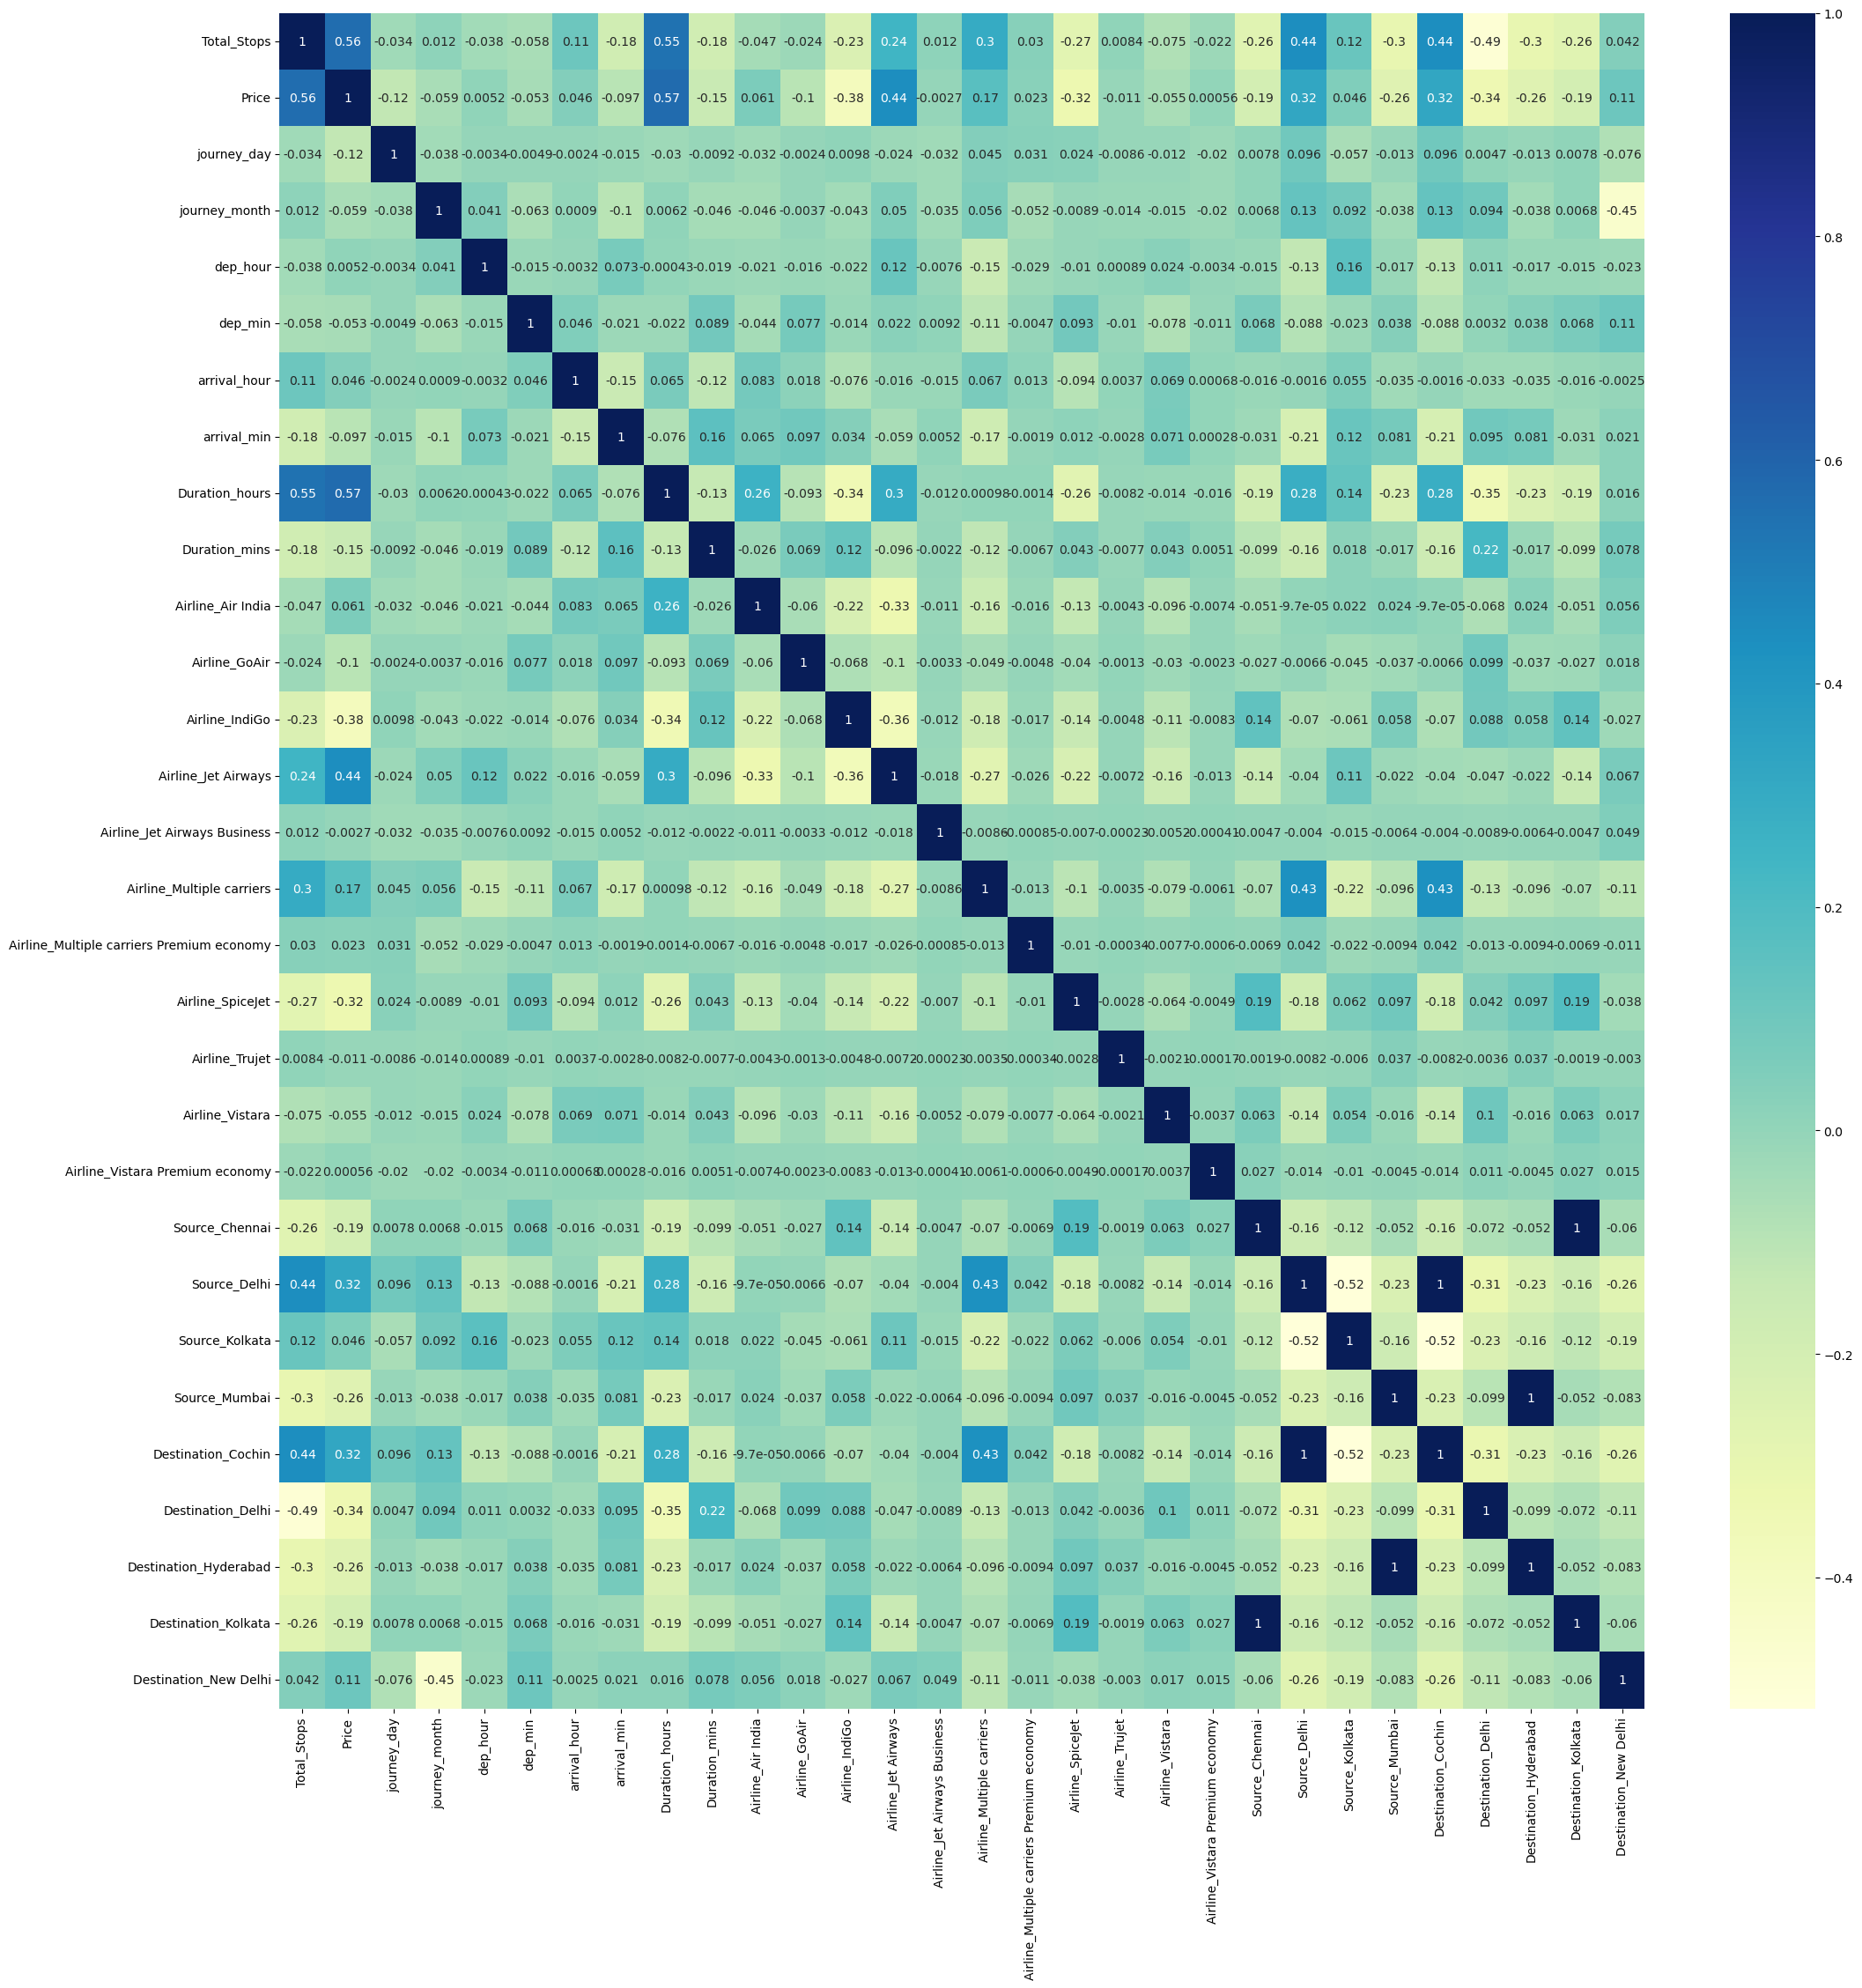

In [68]:
plt.figure(figsize=(25,25)) # figure size
sns.heatmap(data.corr(),annot=True,cmap = "YlGnBu") # creates a heatmap to visualize the correlation matrix of numerical columns in the data DataFrame 

##### Checking For Multicollinearity

<Axes: >

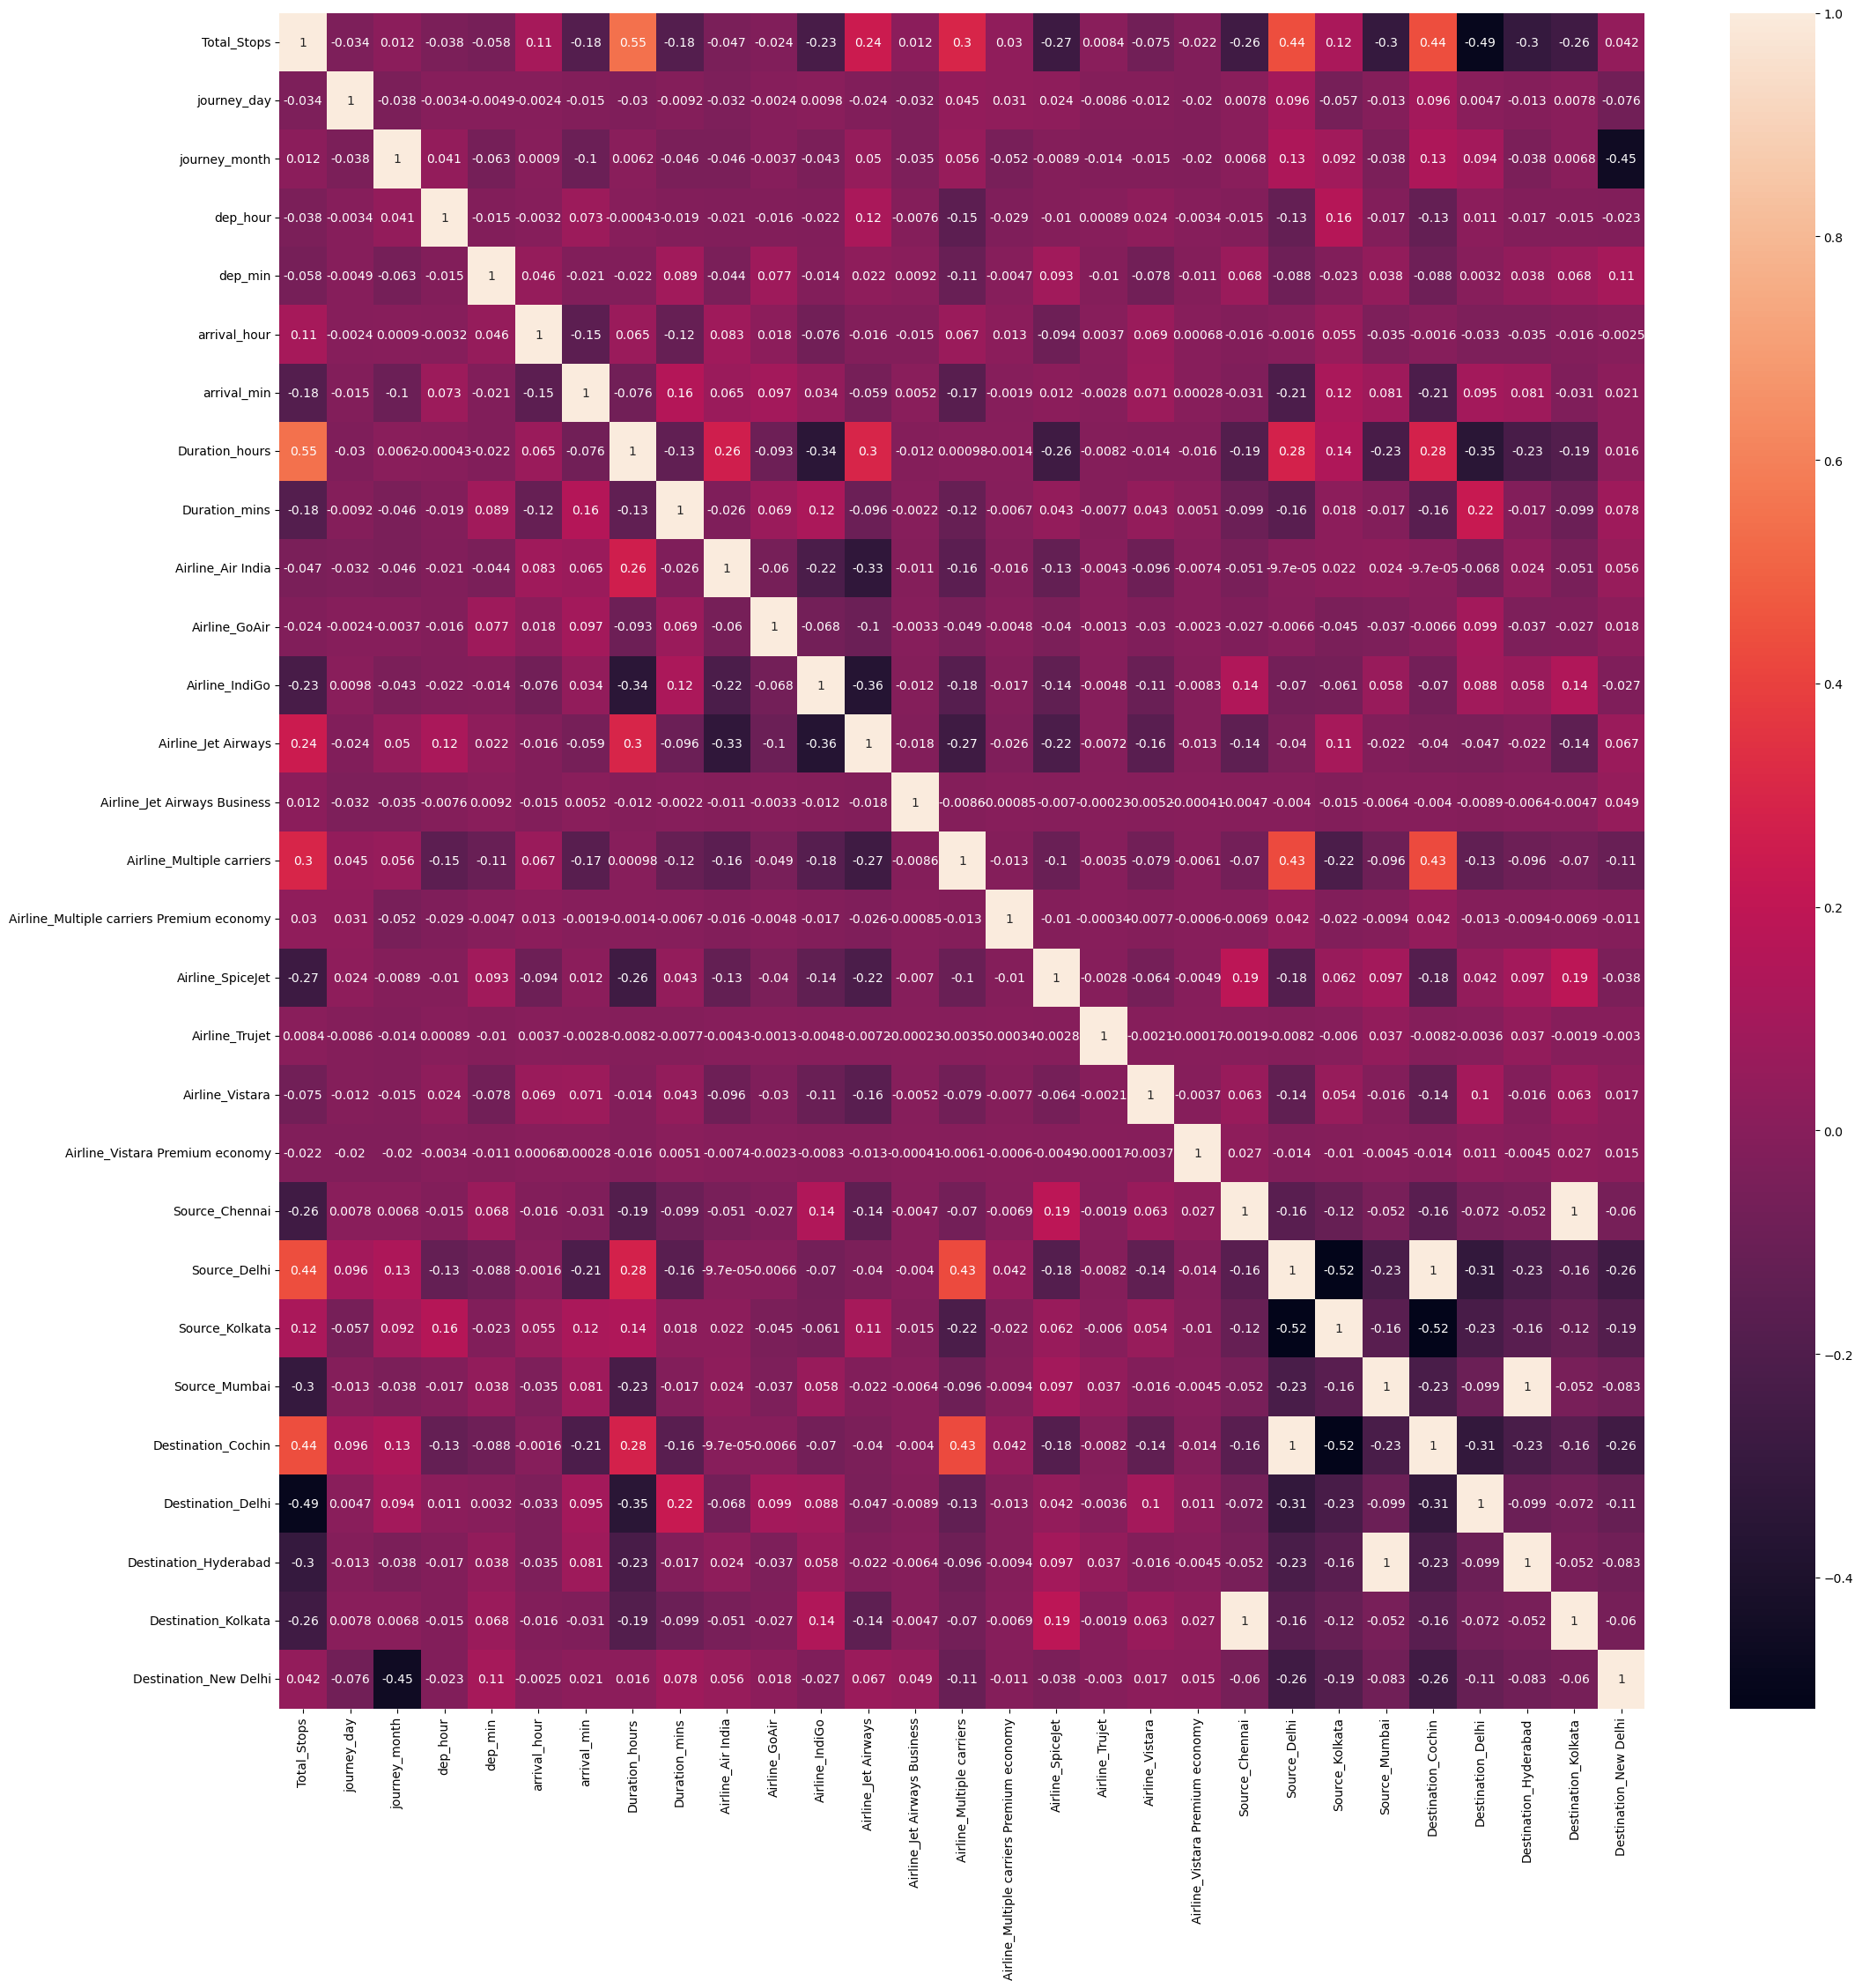

In [69]:
plt.figure(figsize=(25,25)) # figure size
sns.heatmap(data.drop('Price',axis=1).corr(),annot=True) # plots a heatmap of the correlation matrix for all numerical features except "Price" in the data DataFrame

#### Model Creation

##### Creating Independent And Dependent Variables

In [71]:
X=data.drop('Price',axis=1) # drops the entire column named "Price"
y=data.Price  # assigns the "Price" coumn to the variable y

In [72]:
X # displays the entire column after dropping the column "Price"

,Total_Stops,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,1.237383,-1.467490,1.654259,-0.235050,-1.800427,-0.890057,-0.970698,1.279008,0,...,0,0,0,0,0,0,0,0,0,1
1,1,-1.475239,0.250276,-1.303095,1.363492,-0.050851,-0.587124,-0.382117,-0.196388,1,...,0,0,0,1,0,0,0,0,0,0
2,1,-0.531719,1.109160,-0.607247,0.031373,-1.363033,0.018744,1.030476,-1.671784,0,...,0,0,1,0,0,1,0,0,0,0
3,2,-0.177898,0.250276,0.958411,-1.034321,1.407129,0.321677,-0.617549,-0.196388,0,...,0,0,0,1,0,0,0,0,0,0
4,2,-1.475239,-1.467490,0.610487,1.363492,1.115533,0.624611,-0.735265,0.983929,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,-0.531719,-0.608607,1.132373,1.629915,1.261331,0.018744,-0.970698,0.098691,0,...,0,0,0,1,0,0,0,0,0,0
10679,0,1.591203,-0.608607,1.306335,1.097068,1.407129,-0.284190,-0.970698,0.393770,1,...,0,0,0,1,0,0,0,0,0,0
10680,0,1.591203,-0.608607,-0.781209,-0.235050,-0.342447,-0.284190,-0.852981,-1.671784,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,-1.475239,-1.467490,-0.259323,0.297797,0.094947,-0.890057,-0.970698,0.688849,0,...,0,0,0,0,0,0,0,0,0,1


In [73]:
y # Price is stored in the column y it displays the Price when calling y

0       -1.233198
1       -0.303863
2        1.231452
3       -0.660293
4        1.088288
           ...   
10678   -1.181363
10679   -1.171983
10680   -0.410743
10681    0.926857
10682    0.705940
Name: Price, Length: 10461, dtype: float64

In [74]:
X.isnull().sum() # checks for any null values present in X

Total_Stops                                  0
journey_day                                  0
journey_month                                0
dep_hour                                     0
dep_min                                      0
arrival_hour                                 0
arrival_min                                  0
Duration_hours                               0
Duration_mins                                0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chennai                               0
Source_Delhi 

In [75]:
y.isnull().sum() # checks for number of null values present in y

0

In [76]:
from sklearn.model_selection import train_test_split # imports the train_test_split function from scikit-learn's model_selection module
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.2,random_state=2) # splits the dataset into training and testing sets using train_test_split

In [1]:
X_test.shape # returns the shape (dimensions) of the X_test dataset

NameError: name 'X_test' is not defined

In [78]:
y_test.shape # # returns the shape (dimensions) of the y_test dataset

(2093,)

In [79]:
X_train.shape # returns the shape (dimensions) of the X_train dataset

(8368, 29)

#### Linear Regression

In [80]:
from sklearn.linear_model import LinearRegression          # Importing Linear Regression from sklearn.linear_model
LR=LinearRegression()                                      # Object Creation For Linear Regression

LR.fit(X_train,y_train)                                    # Training The Model ( Linear Regression )

LinearRegression()

In [81]:
y_pred=LR.predict(X_test)          # Prediction
y_pred                             # Predicted Values By Model

array([-0.02929688,  0.01367188,  0.58789062, ..., -1.31445312,
       -0.10546875,  0.93945312])

In [82]:
y_test                             # Actual Values

3773   -0.150085
8265    0.801465
7136    1.017199
3951    1.304515
1671   -1.307249
          ...   
2618   -0.128610
3089    0.764934
1066   -1.255413
6944    0.678541
2575    0.858978
Name: Price, Length: 2093, dtype: float64

##### Model Evaluation

In [83]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error  # Importing Mertics To Check Model Performance
r1=r2_score(y_test,y_pred) # calculates the R² score (coefficient of determination) to evaluate the model’s performance
r1 # calls the variable

0.5522529479352474

In [84]:
# Calculation of Adjusted r2score
ad1 = 1-(1-0.5818245556665933)*(2093-1)/(2093-29-1) # calculates the Adjusted R² score based on the R² score, number of observations, and number of features
ad1 # calls the variable

0.575946180540239

In [85]:
lr_mse=mean_squared_error(y_test,y_pred) # calculates the Mean Squared Error (MSE) between the actual values (y_test) and the predicted values (y_pred)
lr_mse # calls the variable

0.4411184047628829

In [86]:
import math #  imports the built-in math module

print('MSE : ',mean_squared_error(y_test,y_pred)) # average squared difference between predicted and actual values
print('RMSE : ',math.sqrt(mean_squared_error(y_test,y_pred))) calculates and prints the Root Mean Squared Error (RMSE) for the model’s predictions
print('MAE : ',mean_absolute_error(y_test,y_pred)) # calculates and prints the Mean Absolute Error (MAE) for the model’s predictions

MSE :  0.4411184047628829
RMSE :  0.6641674523513501
MAE :  0.5177521843025497


#### KNN

In [88]:
from sklearn.neighbors import KNeighborsRegressor # importing KNeighbourRegressor module from sklearn.neighbours library
knr=KNeighborsRegressor(n_neighbors=2) # initializes a K-Nearest Neighbors (KNN) regression model with 2 neighbors
knr.fit(X_train,y_train) # this trains (fits) the K-Nearest Neighbors (KNN) regression model using the training dataset

KNeighborsRegressor(n_neighbors=2)

In [89]:
yk_pred=knr.predict(X_test) # makes predictions on the test dataset (X_test) using the trained K-Nearest Neighbors (KNN) regression model
yk_pred # calling the variable

array([ 0.10489601,  1.04780677,  0.36407305, ..., -1.30761888,
        0.62670579,  0.33790851])

In [90]:
y_test # actual target values

3773   -0.150085
8265    0.801465
7136    1.017199
3951    1.304515
1671   -1.307249
          ...   
2618   -0.128610
3089    0.764934
1066   -1.255413
6944    0.678541
2575    0.858978
Name: Price, Length: 2093, dtype: float64

In [91]:
r2=r2_score(y_test,yk_pred) # calculates the R² score (coefficient of determination) to evaluate how well the KNN regression model fits the data
r2 # calls the variable

0.6915709772985188

In [92]:
ad2 = 1-(1-0.6935876704927932)*(2093-1)/(2093-29-1)
ad2 # calls the variable

0.6892803716291437

In [93]:
kn_mse=mean_squared_error(y_test,yk_pred)
kn_mse # calls the variable

0.303862901719287

In [94]:
print('MSE : ',mean_squared_error(y_test,yk_pred)) # calculates and prints the Mean Squared Error (MSE) between actual (y_test) and predicted (yk_pred) values
print('RMSE : ',math.sqrt(mean_squared_error(y_test,yk_pred))) # calculates and prints the Root Mean Squared Error (RMSE) for the model’s predictions
print('MAE : ',mean_absolute_error(y_test,yk_pred)) # calculates and prints the Mean Absolute Error (MAE) between the actual values (y_test) and the predicted values (yk_pred)

MSE :  0.303862901719287
RMSE :  0.551237609129935
MAE :  0.34911990380597546


#### SVM

In [100]:
from sklearn.svm import SVR 
svregressor = SVR()                           # Base model with default parameters
svregressor.fit(X_train, y_train)

SVR()

In [97]:
ytr_pred=svregressor.predict(X_test) # predicts target values (ytr_pred) for X_test using the trained SVR model (svregressor)
ytr_pred # calls the variable

array([ 0.08039567,  1.0732599 ,  0.77589479, ..., -1.37193827,
        0.63056441,  0.73049284])

In [101]:
y_test # actual target values

3773   -0.150085
8265    0.801465
7136    1.017199
3951    1.304515
1671   -1.307249
          ...   
2618   -0.128610
3089    0.764934
1066   -1.255413
6944    0.678541
2575    0.858978
Name: Price, Length: 2093, dtype: float64

In [102]:
r3=r2_score(y_test,ytr_pred) # calculates the R² (R-squared) score (r3) to evaluate how well the SVR model (svregressor) predicts y_test
r3 # calls the variable

0.7315428583269676

In [103]:
ad3 = 1-(1-0.731542858326968)*(2093-1)/(2093-29-1) # calculates the Adjusted R² score (ad3) based on the R² score (0.7315) and the dataset size
ad3 # calls the variable

0.7277691030635081

In [104]:
svm_mse=mean_squared_error(y_test,ytr_pred) # calculates the Mean Squared Error (MSE) for the SVR model’s predictions (ytr_pred) compared to the actual values (y_test)
svm_mse # calls the variable

0.2644827822671747

In [105]:
print('MSE : ',mean_squared_error(y_test,ytr_pred)) # prints the Mean Squared Error (MSE) between the actual values (y_test) and predicted values (ytr_pred) from the SVR model
print('RMSE : ',math.sqrt(mean_squared_error(y_test,ytr_pred))) # prints the Root Mean Squared Error (RMSE) between the actual values (y_test) and predicted values (ytr_pred) from the SVR model
print('MAE : ',mean_absolute_error(y_test,ytr_pred)) # prints the Mean Absolute Error (MAE) between the actual values (y_test) and predicted values (ytr_pred) from the SVR model

MSE :  0.2644827822671747
RMSE :  0.5142788954129605
MAE :  0.34423659789926486


#### DT

In [106]:
from sklearn.tree import DecisionTreeRegressor        # Importing decision tree from sklearn.tree
dt=DecisionTreeRegressor()                            # Object creation for decision tree
dt.fit(X_train,y_train)                                # Training the model
y_hat=dt.predict(X_test)                               # Prediction
y_hat                                                  # Predicted values

array([ 0.35987685,  1.07372448,  0.36407305, ..., -1.24257778,
        0.62670579,  0.85897778])

In [107]:
y_test # actual target values

3773   -0.150085
8265    0.801465
7136    1.017199
3951    1.304515
1671   -1.307249
          ...   
2618   -0.128610
3089    0.764934
1066   -1.255413
6944    0.678541
2575    0.858978
Name: Price, Length: 2093, dtype: float64

In [108]:
r4=r2_score(y_test,y_hat)
r4 # calling the variable

0.6979637704478341

In [109]:
ad4 = 1-(1-0.6981535001075648)*(2093-1)/(2093-29-1)
ad4 # calling the variable

0.6939103840160086

In [110]:
dt_mse=mean_squared_error(y_test,y_hat)
dt_mse # calling the variable

0.29756475033447954

In [111]:
print('MSE : ',mean_squared_error(y_test,y_hat)) # calculates and prints the Mean Squared Error (MSE) between the actual values (y_test) and the predicted values (y_hat)
print('RMSE : ',math.sqrt(mean_squared_error(y_test,y_hat))) # calculates and prints the Root Mean Squared Error (RMSE) between the actual values (y_test) and predicted values (y_hat)
print('MAE : ',mean_absolute_error(y_test,y_hat)) # calculates and prints the Mean Absolute Error (MAE) between the actual values (y_test) and predicted values (y_hat)

MSE :  0.29756475033447954
RMSE :  0.5454949590367262
MAE :  0.3267708974712349


#### Random Forest

In [112]:
from sklearn.ensemble import RandomForestRegressor    # Importing randomforest

rf_reg = RandomForestRegressor(n_estimators=100)      # Object creation ,taking 100 decision tree in random forest
rf_reg.fit(X_train,y_train)                           # Training the data

RandomForestRegressor()

In [113]:
y_predict=rf_reg.predict(X_test) #testing
y_predict # calling the variable

array([ 0.14019839,  1.04373917,  0.53554038, ..., -1.20389573,
        0.66750272,  0.86885303])

In [114]:
y_test # actual target values

3773   -0.150085
8265    0.801465
7136    1.017199
3951    1.304515
1671   -1.307249
          ...   
2618   -0.128610
3089    0.764934
1066   -1.255413
6944    0.678541
2575    0.858978
Name: Price, Length: 2093, dtype: float64

In [115]:
r5=r2_score(y_test,y_predict) #calculates the R² (R-squared) score (r5) between the actual values (y_test) and predicted values (y_predict)
r5 # calling the variable

0.799690816482369

In [116]:
ad5 = 1-(1-0.8015913130946974)*(2093-1)/(2093-29-1) # calculates the Adjusted R² (ad5) based on the R² value (0.8015913130946974), the number of samples (2093), and the number of features (29)
ad5 # calling the variable

0.7988022428473617

In [117]:
rf_mse=mean_squared_error(y_test,y_predict) # calculates the Mean Squared Error (MSE) for the random forest (or another model) predictions
rf_mse # calling the variable

0.19734371691602884

In [118]:
print('MSE : ',mean_squared_error(y_test,y_predict)) # calculates and prints the Mean Squared Error (MSE) between the actual values (y_test) and predicted values (y_predict)
print('RMSE : ',math.sqrt(mean_squared_error(y_test,y_predict))) # calculates and prints the Root Mean Squared Error (RMSE) by taking the square root of the Mean Squared Error (MSE) between the actual values (y_test) and predicted values (y_predict)
print('MAE : ',mean_absolute_error(y_test,y_predict)) #  calculates and prints the Mean Absolute Error (MAE) between the actual values (y_test) and predicted values (y_predict)

MSE :  0.19734371691602884
RMSE :  0.4442338538608115
MAE :  0.2853499457456494


#### GB

In [119]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()              # Object creation
gbr.fit(X_train,y_train)                     # Fitting the data

GradientBoostingRegressor()

In [120]:
y_gbr=gbr.predict(X_test) # generates predictions (y_gbr) using a Gradient Boosting Regressor (gbr) model for the test set features (X_test)
y_gbr # calling the variable

array([-0.30890399,  0.65450098,  0.94906651, ..., -1.14852905,
        0.53652487,  0.72550386])

In [121]:
y_test # actual target values

3773   -0.150085
8265    0.801465
7136    1.017199
3951    1.304515
1671   -1.307249
          ...   
2618   -0.128610
3089    0.764934
1066   -1.255413
6944    0.678541
2575    0.858978
Name: Price, Length: 2093, dtype: float64

In [122]:
r6=r2_score(y_test,y_gbr) # calculates the R² (R-squared) score (r6) between the actual values (y_test) and the predicted values (y_gbr) generated by the Gradient Boosting Regressor (GBR) model
r6 # calling the variable

0.7384529659904919

In [123]:
ad6 = 1-(1-0.7383671389384977)*(2093-1)/(2093-29-1) # calculates the Adjusted R² (ad6) using the R² value (0.7383671389384977), the number of samples (2093), and the number of features (29)
ad6 # calling the variable

0.7346893139405415

In [124]:
gb_mse=mean_squared_error(y_test,y_gbr) #calculates the Mean Squared Error (MSE) for the Gradient Boosting Regressor (GBR) model by comparing the actual values (y_test) with the predicted values (y_gbr)
gb_mse # calling the variable

0.25767497492323527

In [125]:
print('MSE : ',mean_squared_error(y_test,y_gbr)) # prints the Mean Squared Error (MSE) for the predictions made by the Gradient Boosting Regressor (GBR) model
print('RMSE : ',math.sqrt(mean_squared_error(y_test,y_gbr))) # calculates and prints the Root Mean Squared Error (RMSE) for the predictions made by the Gradient Boosting Regressor (GBR) model. It takes the square root of the MSE to give the error in the original unit of the target variable
print('MAE : ',mean_absolute_error(y_test,y_gbr)) # calculates and prints the Mean Absolute Error (MAE) for the Gradient Boosting Regressor (GBR) model predictions by comparing the actual values (y_test) and the predicted values (y_gbr)

MSE :  0.25767497492323527
RMSE :  0.5076169568909565
MAE :  0.37703250459629695


#### XGB

In [126]:
from xgboost import XGBRegressor       # Importing the model library
xgbr=XGBRegressor()                   # Object creation
xgbr.fit(X_train,y_train)             # Fitting the data

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [127]:
y_xgbr=xgbr.predict(X_test)
y_xgbr # calling the variable

array([ 0.04748265,  1.1537358 ,  0.7217408 , ..., -1.2014308 ,
        0.82993   ,  0.97235966], dtype=float32)

In [128]:
y_test # actual target values

3773   -0.150085
8265    0.801465
7136    1.017199
3951    1.304515
1671   -1.307249
          ...   
2618   -0.128610
3089    0.764934
1066   -1.255413
6944    0.678541
2575    0.858978
Name: Price, Length: 2093, dtype: float64

In [129]:
r7=r2_score(y_test,y_xgbr) # calculates the R² score (r7) between the actual values (y_test) and the predicted values (y_xgbr) generated by an XGBoost Regressor model
r7 # calling the variable

0.8329884590571239

In [130]:
ad7 = 1-(1-0.8367931206337247)*(2093-1)/(2093-29-1) # calculates the Adjusted R² (ad7) using the R² score (0.8367931206337247), the number of samples (2093), and the number of features (29)
ad7 # calling the variable

0.8344988891738983

In [131]:
xgb_mse=mean_squared_error(y_test,y_xgbr) # calculates the Mean Squared Error (MSE) for the XGBoost Regressor (y_xgbr) predictions by comparing the actual values (y_test) with the predicted values (y_xgbr)
xgb_mse # calling the variable

0.164539027511136

In [132]:
print('MSE : ',mean_squared_error(y_test,y_xgbr)) # prints the Mean Squared Error (MSE) for the predictions made by the XGBoost Regressor (y_xgbr) on the test set (y_test)
print('RMSE : ',math.sqrt(mean_squared_error(y_test,y_xgbr))) # prints the Root Mean Squared Error (RMSE) for the predictions made by the XGBoost Regressor (y_xgbr) on the test set (y_test)
print('MAE : ',mean_absolute_error(y_test,y_xgbr)) # prints the Mean Absolute Error (MAE) for the predictions made by the XGBoost Regressor (y_xgbr) on the test set (y_test)

MSE :  0.164539027511136
RMSE :  0.4056341054585228
MAE :  0.27886855334666216


In [135]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'KNN', 'Support Vector Machine','Decision Tree', 'Random Forest',
                'Gradient Boosting', 'XGBoost'],
    'MSE' : [lr_mse,kn_mse,svm_mse,dt_mse,rf_mse,gb_mse,xgb_mse],
    'r2_score' : [r1,r2,r3,r4,r5,r6,r7],
    'adjusted_r2score' : [ad1,ad2,ad3,ad4,ad5,ad6,ad7]
})

models.sort_values(by='MSE', ascending=True)
# creates a DataFrame (models) that compares the performance of various regression models based on their MSE, R² score, and Adjusted R² score. Then, it sorts the models by MSE in ascending order, which will help identify the model with the smallest error

,Model,MSE,r2_score,adjusted_r2score
6,XGBoost,0.164539,0.832988,0.834499
4,Random Forest,0.197344,0.799691,0.798802
5,Gradient Boosting,0.257675,0.738453,0.734689
2,Support Vector Machine,0.264483,0.731543,0.727769
3,Decision Tree,0.297565,0.697964,0.693910
1,KNN,0.303863,0.691571,0.689280
0,Linear Regression,0.441118,0.552253,0.575946


- XGB is working well compared to other models.